In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('../Final Project/videogamesales/vgsales.csv')

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [94]:
df.columns = df.columns.str.lower()

df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


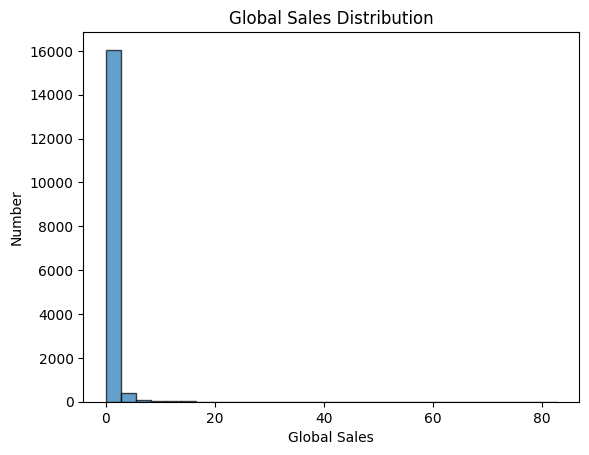

In [95]:
plt.hist(df['global_sales'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Global Sales Distribution')
plt.xlabel('Global Sales')
plt.ylabel('Number')
plt.show()

In [96]:
df['genre'] = df['genre'].fillna('')
df['publisher'] = df['publisher'].fillna('')
df['platform'] = df['platform'].fillna('')

In [97]:
q1 = df['global_sales'].quantile(0.25)
q3 = df['global_sales'].quantile(0.75)
iqr = q3 -q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_df = df[(df['global_sales'] >= lower_bound) & (df['global_sales'] <= upper_bound)]

print(df.shape)
print(filtered_df.shape)

(16598, 11)
(14705, 11)


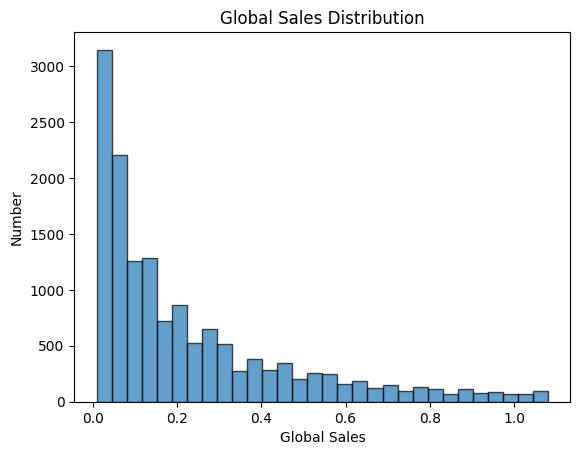

In [98]:
plt.hist(filtered_df['global_sales'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Global Sales Distribution')
plt.xlabel('Global Sales')
plt.ylabel('Number')
plt.show()

In [99]:
global_sales_median = filtered_df['global_sales'].median()
global_sales_median

np.float64(0.14)

In [100]:
filtered_df = df.copy()

filtered_df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [101]:
filtered_df['cat_sales'] = filtered_df['global_sales'] > global_sales_median

filtered_df['cat_sales'] = filtered_df['cat_sales'].map({True: 1, False: 0})

df_clean = filtered_df.drop(columns=['rank', 'name','global_sales'])

df_clean['year'] = df_clean['year'].fillna(df_clean['year'].median())

df_encoded = pd.get_dummies(df_clean, columns=['genre','publisher','platform'], drop_first=True)

X = df_encoded.drop(columns=['cat_sales'])
y = df_encoded['cat_sales'].astype(int)

scaler = StandardScaler()
X['Year'] = scaler.fit_transform(X[['year']])

df_encoded

,year,na_sales,eu_sales,jp_sales,other_sales,cat_sales,genre_Adventure,genre_Fighting,genre_Misc,genre_Platform,...,platform_SAT,platform_SCD,platform_SNES,platform_TG16,platform_WS,platform_Wii,platform_WiiU,platform_X360,platform_XB,platform_XOne
0,2006.0,41.49,29.02,3.77,8.46,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1985.0,29.08,3.58,6.81,0.77,1,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2008.0,15.85,12.88,3.79,3.31,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,2009.0,15.75,11.01,3.28,2.96,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1996.0,11.27,8.89,10.22,1.00,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,2002.0,0.01,0.00,0.00,0.00,0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
16594,2003.0,0.01,0.00,0.00,0.00,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16595,2008.0,0.00,0.00,0.00,0.00,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16596,2010.0,0.00,0.01,0.00,0.00,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
log_reg = LogisticRegression(max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_log)

print(logistic_accuracy)
print(classification_report(y_test, y_pred_log,))

0.9602409638554217
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2226
           1       1.00      0.93      0.96      2754

    accuracy                           0.96      4980
   macro avg       0.96      0.96      0.96      4980
weighted avg       0.96      0.96      0.96      4980



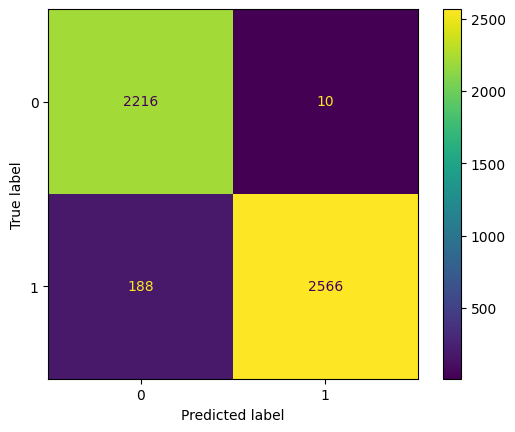

In [115]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log)

In [104]:
decision_tree = DecisionTreeClassifier(max_depth=2,min_samples_split=10, min_samples_leaf=5,random_state=42)
decision_tree.fit(X_train,y_train)

y_pred_dt = decision_tree.predict(X_test)
tree_accuracy = accuracy_score(y_test,y_pred_dt)

print(tree_accuracy)
print(classification_report(y_test, y_pred_dt,zero_division=0))

0.9200803212851406
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2226
           1       0.97      0.88      0.92      2754

    accuracy                           0.92      4980
   macro avg       0.92      0.92      0.92      4980
weighted avg       0.93      0.92      0.92      4980



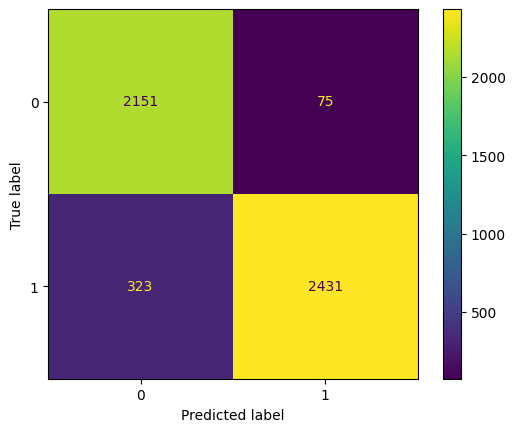

In [105]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)

In [106]:
dt_score = cross_val_score(decision_tree, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {dt_score.mean():.4f}")

Cross-Validation Accuracy: 0.8729


In [107]:
random_forest = RandomForestClassifier(n_estimators=100,random_state=42)

random_forest.fit(X_train,y_train)



RandomForestClassifier(random_state=42)

In [108]:
y_pred_rf = random_forest.predict(X_test)
forest_accuracy = accuracy_score(y_test,y_pred_rf)

print(forest_accuracy)
print(classification_report(y_test, y_pred_rf,zero_division=0))

0.9819277108433735
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2226
           1       0.99      0.98      0.98      2754

    accuracy                           0.98      4980
   macro avg       0.98      0.98      0.98      4980
weighted avg       0.98      0.98      0.98      4980



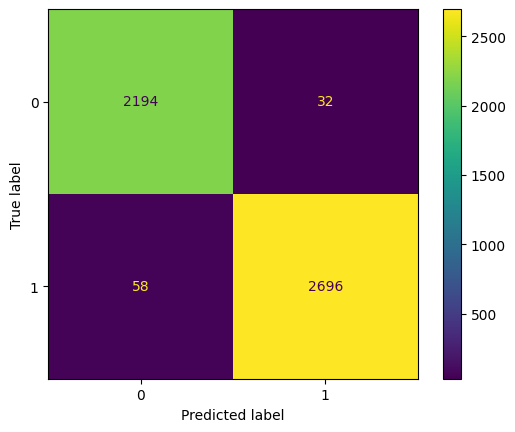

In [116]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

In [109]:
rf_score = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {rf_score.mean():.4f}")

Cross-Validation Accuracy: 0.9013


In [110]:
xgbc = XGBClassifier(eval_metric='logloss',random_state=42)
xgbc.fit(X_train, y_train)

y_pred_xgbc = xgbc.predict(X_test)
xgbc_accuracy = accuracy_score(y_test,y_pred_xgbc)

print(xgbc_accuracy)
print(classification_report(y_test, y_pred_xgbc,zero_division=0))

0.9907630522088353
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2226
           1       0.99      0.99      0.99      2754

    accuracy                           0.99      4980
   macro avg       0.99      0.99      0.99      4980
weighted avg       0.99      0.99      0.99      4980



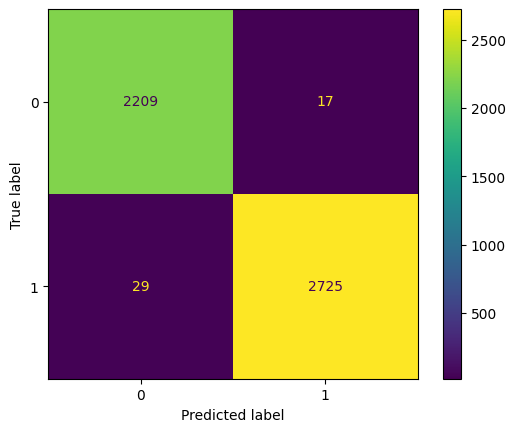

In [113]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgbc)

In [111]:
xgbc_score = cross_val_score(xgbc, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {xgbc_score.mean():.4f}")

Cross-Validation Accuracy: 0.9042


In [112]:
svm = SVC(kernel='linear',random_state=42)
svm.fit(X_train,y_train)

y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test,y_pred_svm)

print(svm_accuracy)
print(classification_report(y_test, y_pred_svm,zero_division=0))

0.7947791164658634
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      2226
           1       0.85      0.76      0.80      2754

    accuracy                           0.79      4980
   macro avg       0.80      0.80      0.79      4980
weighted avg       0.80      0.79      0.80      4980



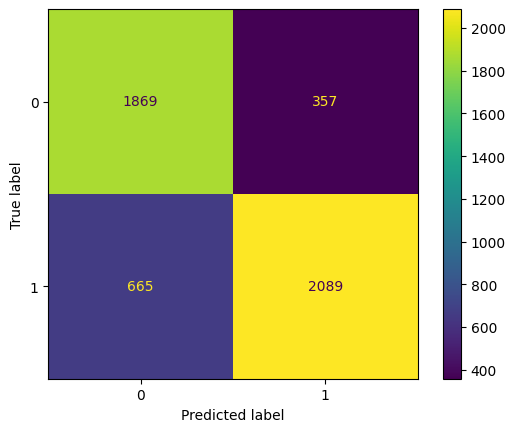

In [114]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)

In [124]:
cross_table_genre = pd.crosstab(index=df_clean['genre'], columns=df_encoded['cat_sales'])

print(cross_table_genre)

cat_sales        0     1
genre                   
Action        1393  1923
Adventure      940   346
Fighting       349   499
Misc           828   911
Platform       330   556
Puzzle         349   233
Racing         537   712
Role-Playing   668   820
Shooter        517   793
Simulation     419   448
Sports         859  1487
Strategy       416   265


In [ ]:
cross_table_publisher = pd.crosstab(index=df_clean['publisher'], columns=df_encoded['cat_sales'])

print(cross_table_genre)

cat_sales                      0   1
publisher                           
                              30  28
10TACLE Studios                3   0
1C Company                     3   0
20th Century Fox Video Games   0   5
2D Boy                         1   0
...                           ..  ..
id Software                    1   0
imageepoch Inc.                2   0
inXile Entertainment           1   0
mixi, Inc                      0   1
responDESIGN                   2   0

[579 rows x 2 columns]


In [126]:
cross_table_platform = pd.crosstab(index=df_clean['platform'], columns=df_encoded['cat_sales'])

print(cross_table_platform)

cat_sales     0     1
platform             
2600          4   129
3DO           3     0
3DS         280   229
DC           29    23
DS         1296   867
GB           10    88
GBA         382   440
GC          270   286
GEN          13    14
GG            1     0
N64          84   235
NES           3    95
NG            8     4
PC          698   262
PCFX          1     0
PS          420   776
PS2         801  1360
PS3         427   902
PS4         137   199
PSP         784   429
PSV         297   116
SAT          99    74
SCD           5     1
SNES         61   178
TG16          2     0
WS            1     5
Wii         530   795
WiiU         62    81
X360        399   866
XB          418   406
XOne         80   133


In [127]:
cross_table_year = pd.crosstab(index=df_clean['year'], columns=df_encoded['cat_sales'])

print(cross_table_year)

cat_sales    0    1
year               
1980.0       0    9
1981.0       1   45
1982.0       1   35
1983.0       0   17
1984.0       0   14
1985.0       2   12
1986.0       0   21
1987.0       2   14
1988.0       1   14
1989.0       1   16
1990.0       0   16
1991.0       5   36
1992.0      10   33
1993.0      19   41
1994.0      46   75
1995.0     113  106
1996.0      90  173
1997.0      90  199
1998.0     142  237
1999.0      93  245
2000.0     108  241
2001.0     167  315
2002.0     385  444
2003.0     316  459
2004.0     301  462
2005.0     417  524
2006.0     573  435
2007.0     716  757
2008.0     676  752
2009.0     690  741
2010.0     625  634
2011.0     584  555
2012.0     303  354
2013.0     235  311
2014.0     272  310
2015.0     371  243
2016.0     247   97
2017.0       3    0
2020.0       0    1
